<a href="https://colab.research.google.com/github/Sphumelel/Sphumelel/blob/main/Impact_of_COVID_19_on_SMEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Washed Data.csv', encoding='latin-1')

In [4]:
print(data.head())

   loyer  No of employee Annual turnover         TCTC Basic Salary  \
0      1              63      3098000000  13782989.04   9500520.21   
1      2              73        15000000    326574.61       992400   
2      3              18               0    543629.21    397789.63   
3      4              25        52000000    725607.67       496910   
4      5               1        765270.6    205385.34        31530   

   Cash Injection  Contrib Waiver  Affected Employee  
0               0               1                  0  
1               1               1                  1  
2               0               1                  1  
3               0               1                  1  
4               0               0                  0  


In [5]:
data = data.dropna()

In [6]:
# Features and target variable
features=['loyer','No of employee', 'Annual turnover', 'TCTC', 'Basic Salary', 'Cash Injection', 'Contrib Waiver', 'Affected Employee']
target = 'Annual turnover'

In [8]:
# Convert categorical features to dummy variables (one-hot encoding)
data = pd.get_dummies(data, columns=['Annual turnover'], drop_first=True)

In [9]:
x=data[features]
y=data[target]

KeyError: "['Annual turnover'] not in index"

In [11]:
features=['loyer','No of employee', 'TCTC', 'Basic Salary', 'Cash Injection', 'Contrib Waiver', 'Affected Employee'] # Removed 'Annual turnover' from features
target = 'Annual turnover'

# No need to one-hot encode again as it's already done.

# The new target variables will be the one-hot encoded columns
new_target_columns = [col for col in data.columns if 'Annual turnover' in col] # Get the names of new columns created by one-hot encoding

x=data[features]
y=data[new_target_columns] # Select the new target columns

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge()  # Initialize Ridge Regression
parameters = {
    'alpha': [0.1, 1, 10, 100]  # List of alpha values to try (regularization strength)
}

In [36]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [38]:
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

In [39]:
print("Best Alpha Value:", best_alpha)
print("Best Model:", best_model)

Best Alpha Value: 10
Best Model: Ridge(alpha=10)


In [16]:
# Initialize the model
model = LinearRegression()


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [43]:
cv_scores = -cv_scores

In [44]:
print("Cross-Validation MSE Scores:", cv_scores)
print("Average Cross-Validation MSE:", np.mean(cv_scores))

Cross-Validation MSE Scores: [0.00055256 0.00055286 0.00054727 0.00055459 0.00052307]
Average Cross-Validation MSE: 0.0005460678298486871


In [17]:
# Train the model
model.fit(X_train, y_train)

ValueError: could not convert string to float: '/A'

In [18]:
# Convert potential string columns to numeric in both features and target
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Fill any missing values (NaN) resulting from the conversion, if necessary
X_train = X_train.fillna(0) # Replace with a suitable strategy
y_train = y_train.fillna(0) # Replace with a suitable strategy

# Now, try fitting the model again
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

ValueError: could not convert string to float: '/A'

In [20]:
# Convert potential string columns to numeric in X_test
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any missing values (NaN) resulting from the conversion, if necessary
X_test = X_test.fillna(0) # Replace with a suitable strategy

# Now, try predicting again
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.00059349923380803
R^2 Score: -0.0004654621229638312


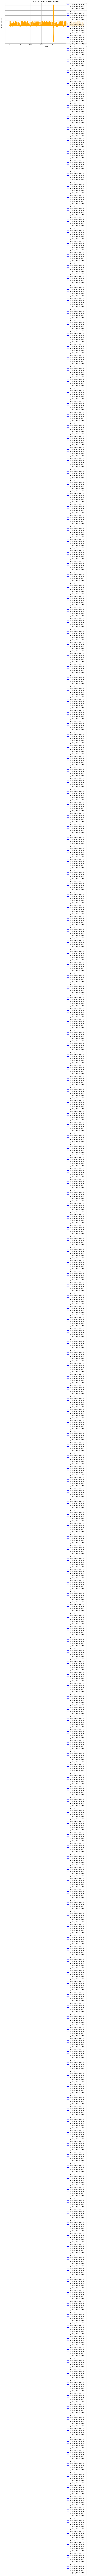

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Annual turnover', color='blue')

# Reshape y_pred to be 1-dimensional
y_pred_flattened = y_pred.flatten()
plt.plot(pd.Series(y_pred_flattened), label='Predicted Annual turnover', color='orange', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Annual turnover')
plt.title('Actual vs. Predicted Annual turnover')
plt.legend()
plt.grid(True)
plt.show()

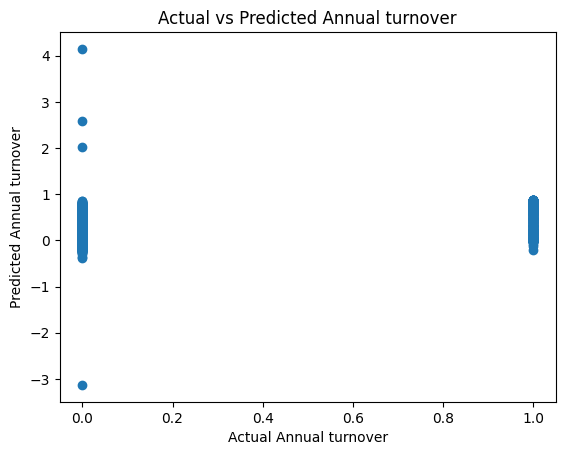

In [23]:
# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Annual turnover')
plt.ylabel('Predicted Annual turnover')
plt.title('Actual vs Predicted Annual turnover')
plt.show()

In [24]:
# Feature importance (for linear regression)
importance = model.coef_
features_importance = pd.Series(importance, index=features)
print("Feature Importance:\n", features_importance)

ValueError: Length of values (1397) does not match length of index (7)

In [25]:
# Feature importance (for linear regression)
importance = model.coef_[0]  # Get coefficients for the first sample (or average them if needed)
features_importance = pd.Series(importance, index=features)
print("Feature Importance:\n", features_importance)

Feature Importance:
 loyer               -3.520284e-07
No of employee      -2.042130e-06
TCTC                 2.560578e-11
Basic Salary        -5.427391e-12
Cash Injection       1.682290e-04
Contrib Waiver       2.466186e-04
Affected Employee    5.674619e-04
dtype: float64


In [28]:
joblib.dump(model, 'linear_regression_model.pkl')

print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [29]:
 model = joblib.load('linear_regression_model.pkl')
 print("Model loaded from 'linear_regression_model.pkl'")

Model loaded from 'linear_regression_model.pkl'
